# Import

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [1]:
import pandas as pd
import random
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import xgboost as xgb

In [2]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
seed_everything(42) # Seed 고정

# Data Load _ train

%pwd

In [8]:
# mac
base_path = '/Users/cge/Documents/python/LGaimers/open/'

train_df = pd.read_csv(base_path+'train.csv')

x_feature_info = pd.read_csv('/Users/cge/Documents/python/LGaimers/open/meta/x_feature_info.csv')
y_feature_info = pd.read_csv('/Users/cge/Documents/python/LGaimers/open/meta/y_feature_info.csv')
y_feature_spec_info = pd.read_csv('/Users/cge/Documents/python/LGaimers/open/meta/y_feature_spec_info.csv')

In [9]:
train_x = train_df.filter(regex='X') # Input : X Featrue
train_y = train_df.filter(regex='Y') # Output : Y Feature

# EDA

In [5]:
x_feature_info

,Feature,설명
0,X_01,PCB 체결 시 단계별 누름량(Step 1)
1,X_02,PCB 체결 시 단계별 누름량(Step 2)
2,X_03,방열 재료 1 무게
3,X_04,1차 검사 통과 여부
4,X_05,PCB 체결 시 단계별 누름량(Step 3)
5,X_06,PCB 체결 시 단계별 누름량(Step 4)
6,X_07,방열 재료 1 면적
7,X_08,방열 재료 2 면적
8,X_09,방열 재료 3 면적
9,X_10,방열 재료 2 무게


<img src="corr.png" width="1200" style="float:left" />

In [7]:
y_feature_info

,Feature,설명
0,Y_01,안테나 Gain 평균 (각도1)
1,Y_02,안테나 1 Gain 편차
2,Y_03,안테나 2 Gain 편차
3,Y_04,평균 신호대 잡음비
4,Y_05,안테나 Gain 평균 (각도2)
5,Y_06,신호대 잡음비 (각도1)
6,Y_07,안테나 Gain 평균 (각도3)
7,Y_08,신호대 잡음비 (각도2)
8,Y_09,신호대 잡음비 (각도3)
9,Y_10,신호대 잡음비 (각도4)


In [8]:
group_dict = {
    "Group_1" : ["X_01", "X_02", "X_05", "X_06"],
    "Group_2" : ["X_03", "X_10", "X_11"],
    "Group_3" : ["X_04", "X_23", "X_47", "X_48"],
    "Group_4" : ["X_07", "X_08", "X_09"],
    "Group_5" : ["X_12"],
    "Group_6" : ["X_13"],
    "Group_7" : ["X_14", "X_15", "X_16", "X_17", "X_18"],
    "Group_8" : ["X_19", "X_20", "X_21", "X_22"],
    "Group_9" : ["X_24", "X_25", "X_26", "X_27", "X_28", "X_29"],
    "Group_10" : ["X_30", "X_31", "X_32", "X_33"],
    "Group_11" : ["X_34", "X_35", "X_36", "X_37"],
    "Group_12" : ["X_38", "X_39", "X_40"],
    "Group_13" : ["X_41", "X_42", "X_43", "X_44"],
    "Group_14" : ["X_45"],
    "Group_15" : ["X_46"],
    "Group_16" : ["X_49"],
    "Group_17" : ["X_50", "X_51", "X_52", "X_53", "X_54", "X_55", "X_56"],
}

In [9]:
# train_x.describe(include='all')

# train_y.describe(include='all')

In [7]:
display(train_df.shape, train_x.shape, train_y.shape)

(39607, 71)

(39607, 56)

(39607, 14)

## info

In [10]:
def infox(df):
    from IPython.core.display import display, HTML
    display(HTML("<style>.container { width:100% !important; }</style>"))
    print( f"◆◆◆ {df.shape}: Total shape ◆◆◆" )
    df_num = df.select_dtypes( include='number', exclude=['cfloat','complex64',"complex128"] )
    if df_num.shape[1] > 0:
        print( f"---{df_num.shape}: Numeric Data: only Real Number ↓↓↓ " + "-"*27 )
        df_info = pd.DataFrame(  [[ i for i in range(df_num.shape[1]) ]], columns=df_num.columns, index=["NO"]  )
        df_info.loc["Column"] = df_num.columns
        df_info.loc["null"] = len(df_num) - df_num.count()
        df_info.loc["null(%)"] = round( 100 * (len(df_num)-df_num.count()) / len(df_num), 1)
        df_info.loc["dtype"] = df_num.dtypes
        df_info.loc["n_uniq"] = df_num.nunique()
        df_info.loc["|"] = "|"
        df_info.loc["Mean"] = df_num.mean()
        df_info.loc["Std"] = df_num.std(ddof=0)
        df_info.loc["|max-min|"] = df_num.max() - df_num.min()
        df_info.loc["│"] = "│"
        df_info.loc["min"] = df_num.min()
        df_info.loc["Q1"] = df_num.quantile(0.25)
        df_info.loc["median"] = df_num.median()   
        df_info.loc["Q3"] = df_num.quantile(0.75)
        df_info.loc["max"] = df_num.max() 
        df_info = df_info.T
        df_info["NO"] = df_info["NO"].astype(int)
        df_info["null"] = df_info["null"].astype(int) 
        for i in range(len(df_info)):
            for j in [5,7,8,9]+list(range(11,df_info.shape[1])):
                if df_info.iloc[i,j]==int(df_info.iloc[i,j]):
                    df_info.iloc[i,j]=str(f'{df_info.iloc[i,j]:,}').split(".")[0] 
                elif abs( df_info.iloc[i,j] ) >= 1000:
                    df_info.iloc[i,j]=str(f'{df_info.iloc[i,j]:,}').split(".")[0] 
                elif abs( df_info.iloc[i,j] ) >= 100:
                    df_info.iloc[i,j]=str(f'{df_info.iloc[i,j]:,.1f}').rstrip("0") 
                elif abs( df_info.iloc[i,j] ) >= 10:
                    df_info.iloc[i,j]=str(f'{df_info.iloc[i,j]:,.2f}').rstrip("0") 
                elif abs( df_info.iloc[i,j] ) >= 1:
                    df_info.iloc[i,j]=str(f'{df_info.iloc[i,j]:,.3f}').rstrip("0")
                else:
                    df_info.iloc[i,j]=str(f'{df_info.iloc[i,j]:,.4f}').rstrip("0")
        df_info = df_info.astype(str)
        df_col = pd.DataFrame( [df_info.columns], columns=df_info.columns )
        df_info = pd.concat( [df_col,df_info] )
        df_len = df_info.copy()
        for i in range(len(df_len)):
            for j in range(df_len.shape[1]):
                df_len.iloc[i,j]=len(df_len.iloc[i,j])
        for i in range(len(df_info)):
            for j in range(df_info.shape[1]):
                print(df_info.iloc[i,j].rjust(  df_len.max()[j]  ), end="  ")
            print()
    df_time = df.select_dtypes(include='datetime')
    if df_time.shape[1] > 0:
        print( f"---{df_time.shape}: DateTime Data ↓↓↓ " + "-"*44 )
        df_info = pd.DataFrame(  [[ i for i in range(df_time.shape[1]) ]], columns=df_time.columns, index=["NO"]  )
        df_info.loc["Column"] = df_time.columns  
        df_info.loc["null"] = len(df_time) - df_time.count()
        df_info.loc["null(%)"] = round( 100 * (len(df_time)-df_time.count()) / len(df_time), 1)
        df_info.loc["dtype"] = df_time.dtypes
        df_info.loc["n_uniq"] = df_time.nunique()
        df_info.loc["|"] = "|"
        df_info.loc["min"] = df_time.min()
        df_info.loc["max"] = df_time.max() 
        df_info = df_info.T
        df_info["NO"] = df_info["NO"].astype(int) 
        df_info["null"] = df_info["null"].astype(int)
        for i in range(len(df_info)):
            df_info.iloc[i,5]=str(f'{df_info.iloc[i,5]:,}').split(".")[0]
        df_info = df_info.astype(str)
        df_col = pd.DataFrame( [df_info.columns], columns=df_info.columns )
        df_info = pd.concat( [df_col,df_info] )
        df_len = df_info.copy()
        for i in range(len(df_len)):
            for j in range(df_len.shape[1]):
                df_len.iloc[i,j]=len(df_len.iloc[i,j])
        for i in range(len(df_info)):
            for j in range(df_info.shape[1]):
                print(df_info.iloc[i,j].rjust(  df_len.max()[j]  ), end="  ") 
            print()
    df_obj_1 = df.select_dtypes( exclude=['number','datetime'] )
    df_obj_2 = df.select_dtypes( include=['cfloat','complex64',"complex128"] )
    df_obj = pd.concat( [df_obj_1,df_obj_2], axis=1 )
    if df_obj.shape[1] > 0:
        print( f"---{df_obj.shape}: etc Data: Object, Complex Numbers, ... ↓↓↓ " + "-"*19 )
        df_info = pd.DataFrame(  [[ i for i in range(df_obj.shape[1]) ]], columns=df_obj.columns, index=["NO"]  )
        df_info.loc["Column"] = df_obj.columns 
        df_info.loc["null"] = len(df_obj) - df_obj.count()
        df_info.loc["null(%)"] = round( 100 * (len(df_obj)-df_obj.count()) / len(df_obj), 1)
        df_info.loc["dtype"] = df_obj.dtypes
        df_info.loc["n_uniq"] = df_obj.nunique()
        df_info.loc["|"] = "|"
        freq_list = []
        for i in range(df_obj.shape[1]):
            freq_list.append(  list(df_obj.iloc[:,i].value_counts())[0]  )
        df_info.loc["No1_freq_count"] = freq_list
        df_info.loc["rate(%)"] = [ f"{100*x/len(df_obj):.1f}" for x in freq_list ]
        df_info.loc["value"] = list(  df_obj.mode().iloc[0]  )
        df_info = df_info.T
        df_info["NO"] = df_info["NO"].astype(int) 
        df_info["null"] = df_info["null"].astype(int)
        for i in range(len(df_info)):
            for j in [5,7]:
                df_info.iloc[i,j]=str(f'{df_info.iloc[i,j]:,}').split(".")[0]
        df_info = df_info.astype(str)
        df_col = pd.DataFrame( [df_info.columns], columns=df_info.columns )
        df_info = pd.concat( [df_col,df_info] )
        df_len = df_info.copy()
        for i in range(len(df_len)):
            for j in range(df_len.shape[1]):
                df_len.iloc[i,j]=len(df_len.iloc[i,j])
        for i in range(len(df_info)):
            for j in range(df_info.shape[1]):
                if j !=9:
                    print(df_info.iloc[i,j].rjust(  df_len.max()[j]  ), end="  ")
                else:
                    print(df_info.iloc[i,j].ljust(  df_len.max()[j]  ), end="  ")
            print()
        print("-"*78)

In [13]:
infox(train_df)

/var/folders/08/yfq1rzmx605_pllcn65f77540000gn/T/ipykernel_1123/2059725199.py:2: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


◆◆◆ (39607, 71): Total shape ◆◆◆
---(39607, 70): Numeric Data: only Real Number ↓↓↓ ---------------------------
NO  Column  null  null(%)    dtype  n_uniq  |    Mean     Std  |max-min|  │     min      Q1  median      Q3      max  
 0    X_01     0      0.0  float64      28  |   68.41   2.656      28.55  │   56.27   66.47    68.5   69.52    84.82  
 1    X_02     0      0.0  float64       2  |   103.3  0.0004      0.001  │   103.3   103.3   103.3   103.3    103.3  
 2    X_03     0      0.0  float64     280  |   68.83   5.151       32.7  │   56.47   65.07   67.27   71.77    89.17  
 3    X_04     0      0.0    int64       1  |       1       0          0  │       1       1       1       1        1  
 4    X_05     0      0.0  float64     442  |   102.3  0.5483      1.386  │   101.8   101.9    102.   103.1    103.2  
 5    X_06     0      0.0  float64      25  |    70.6    2.26      25.49  │   61.73   68.86   69.88   71.92    87.22  
 6    X_07     0      0.0  float64   1,419  |   29.41  

결측치는 없음!!

## 검사통과여부 (1~4차) drop
**train_df2** value = 1로 동일

In [10]:
train_df2 = train_df.copy()

In [201]:
train_df2.loc[train_df2.X_38 > 30,'X_38']

24093    32.23
Name: X_38, dtype: float64

In [9]:
print(f'X_04: ',train_df2.X_04.value_counts())
print()
print(f'X_23: ',train_df2.X_23.value_counts())
print()
print(f'X_47: ',train_df2.X_47.value_counts())
print()
print(f'X_48: ',train_df2.X_48.value_counts())

X_04:  1    39607
Name: X_04, dtype: int64

X_23:  1    39607
Name: X_23, dtype: int64

X_47:  1    39607
Name: X_47, dtype: int64

X_48:  1    39607
Name: X_48, dtype: int64


In [10]:
train_df2.shape

(39607, 71)

In [32]:
train_df2.drop(columns=["X_04", "X_23", "X_47", "X_48"], inplace=True)

In [33]:
train_df2.shape

(39606, 67)

In [34]:
train_df2.columns

Index(['ID', 'X_01', 'X_02', 'X_03', 'X_05', 'X_06', 'X_07', 'X_08', 'X_09',
       'X_10', 'X_11', 'X_12', 'X_13', 'X_14', 'X_15', 'X_16', 'X_17', 'X_18',
       'X_19', 'X_20', 'X_21', 'X_22', 'X_24', 'X_25', 'X_26', 'X_27', 'X_28',
       'X_29', 'X_30', 'X_31', 'X_32', 'X_33', 'X_34', 'X_35', 'X_36', 'X_37',
       'X_38', 'X_39', 'X_40', 'X_41', 'X_42', 'X_43', 'X_44', 'X_45', 'X_46',
       'X_49', 'X_50', 'X_51', 'X_52', 'X_53', 'X_54', 'X_55', 'X_56', 'Y_01',
       'Y_02', 'Y_03', 'Y_04', 'Y_05', 'Y_06', 'Y_07', 'Y_08', 'Y_09', 'Y_10',
       'Y_11', 'Y_12', 'Y_13', 'Y_14'],
      dtype='object')

/var/folders/lm/z4n_2b8s6rj3_vv57sg789kc0000gn/T/ipykernel_16522/4016001713.py:13: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  train_df2[train_df_col].hist(ax = ax)


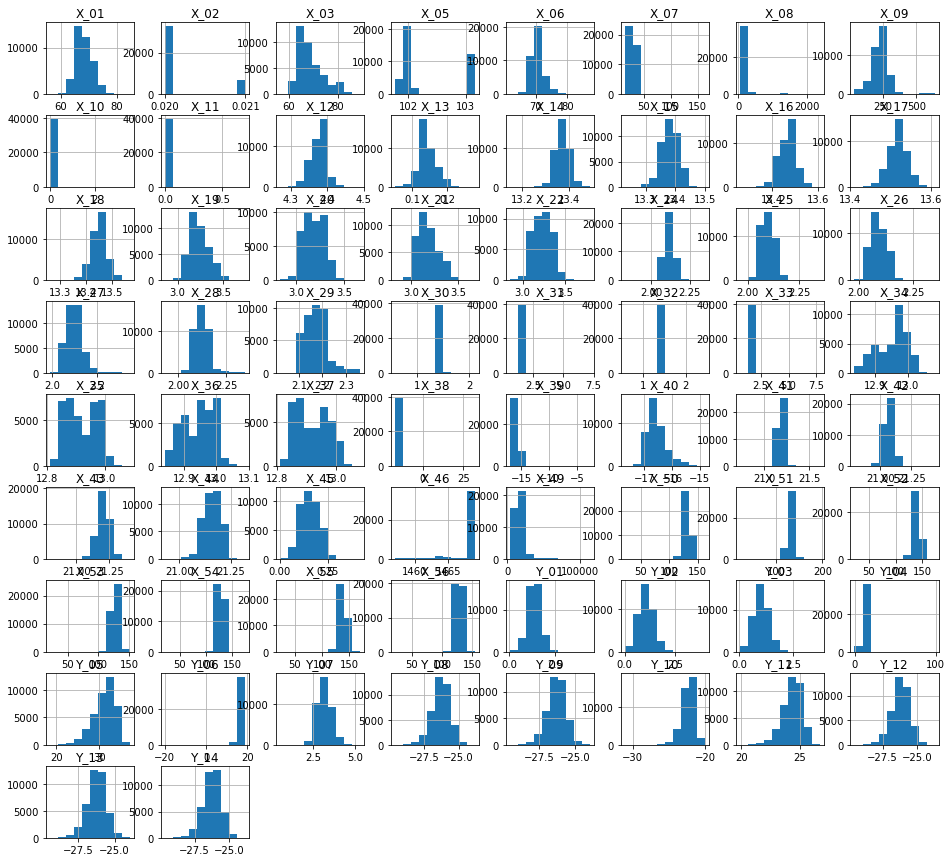

In [44]:
train_df_col = ['ID', 'X_01', 'X_02', 'X_03', 'X_05', 'X_06', 'X_07', 'X_08', 'X_09',
       'X_10', 'X_11', 'X_12', 'X_13', 'X_14', 'X_15', 'X_16', 'X_17', 'X_18',
       'X_19', 'X_20', 'X_21', 'X_22', 'X_24', 'X_25', 'X_26', 'X_27', 'X_28',
       'X_29', 'X_30', 'X_31', 'X_32', 'X_33', 'X_34', 'X_35', 'X_36', 'X_37',
       'X_38', 'X_39', 'X_40', 'X_41', 'X_42', 'X_43', 'X_44', 'X_45', 'X_46',
       'X_49', 'X_50', 'X_51', 'X_52', 'X_53', 'X_54', 'X_55', 'X_56', 'Y_01',
       'Y_02', 'Y_03', 'Y_04', 'Y_05', 'Y_06', 'Y_07', 'Y_08', 'Y_09', 'Y_10',
       'Y_11', 'Y_12', 'Y_13', 'Y_14']

fig = plt.figure(figsize=(16,15))
ax = fig.gca()

train_df2[train_df_col].hist(ax = ax)
plt.show()

In [67]:
train_df2.columns

Index(['ID', 'X_01', 'X_02', 'X_03', 'X_05', 'X_06', 'X_07', 'X_08', 'X_09',
       'X_10', 'X_11', 'X_12', 'X_13', 'X_14', 'X_15', 'X_16', 'X_17', 'X_18',
       'X_19', 'X_20', 'X_21', 'X_22', 'X_24', 'X_25', 'X_26', 'X_27', 'X_28',
       'X_29', 'X_30', 'X_31', 'X_32', 'X_33', 'X_34', 'X_35', 'X_36', 'X_37',
       'X_38', 'X_39', 'X_40', 'X_41', 'X_42', 'X_43', 'X_44', 'X_45', 'X_46',
       'X_49', 'X_50', 'X_51', 'X_52', 'X_53', 'X_54', 'X_55', 'X_56', 'Y_01',
       'Y_02', 'Y_03', 'Y_04', 'Y_05', 'Y_06', 'Y_07', 'Y_08', 'Y_09', 'Y_10',
       'Y_11', 'Y_12', 'Y_13', 'Y_14'],
      dtype='object')

## heatmap

In [68]:
train_df2 = train_df2.drop(columns=['ID'],axis=1)

In [70]:
train_df2.shape

(39607, 71)

In [71]:
train_corr = train_df2.corr()
train_corr_2 = train_corr.apply(lambda x:round(x,1)) # 반올림

train_corr.iloc[0,:].sort_values() # 내림차순

X_27   -0.144843
X_12   -0.134767
X_28   -0.127215
X_29   -0.125370
X_45   -0.122236
          ...   
X_19    0.297321
X_22    0.323213
X_05    0.553986
X_06    0.626520
X_01    1.000000
Name: X_01, Length: 66, dtype: float64

<AxesSubplot:>

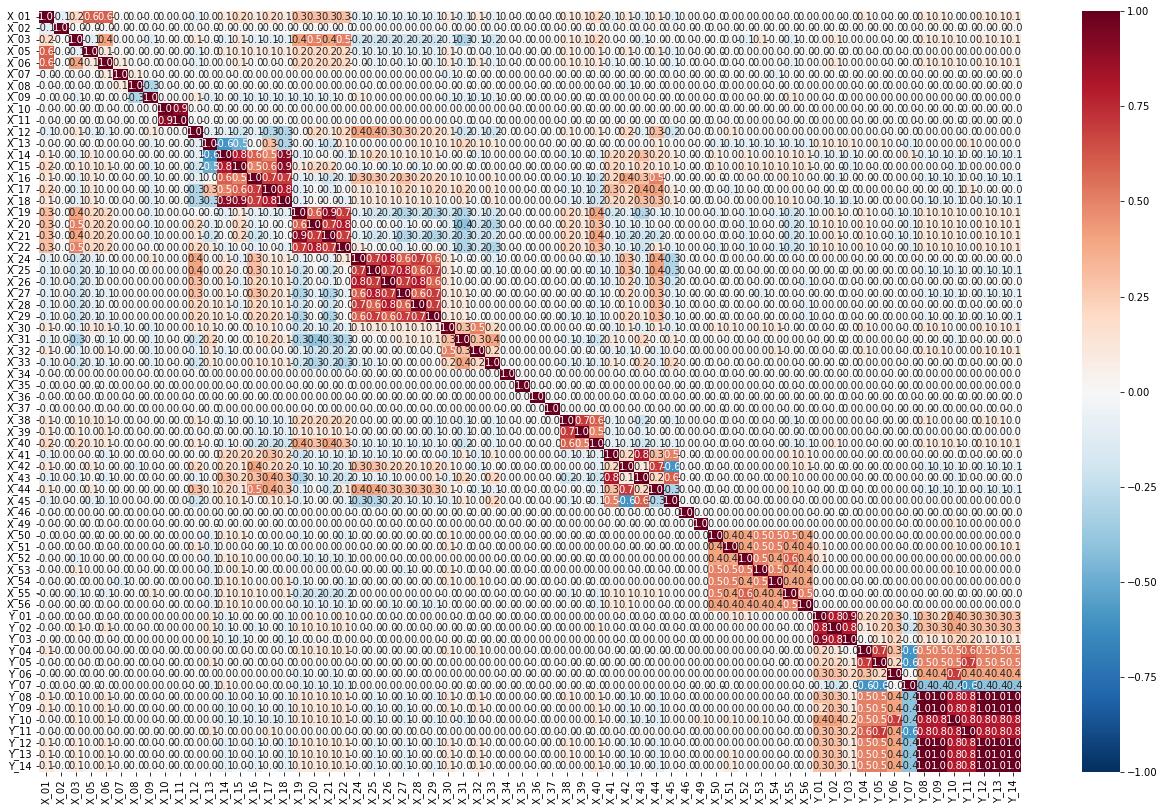

In [93]:
plt.figure(figsize=(22,14))
sns.heatmap(train_corr_2, cmap='RdBu_r', vmax=1, vmin=-1, annot=True, fmt='.1f')

# 데이터 load 후 여기부터!! 

In [12]:
train_df2.drop(columns=['X_02', 'X_04', 'X_23', 'X_46', 'X_47', 'X_48'], inplace=True)

In [11]:
train_df2.drop(columns=['Y_01', 'Y_02', 'Y_03', 'Y_04', 'Y_05', 'Y_06',
       'Y_07', 'Y_08', 'Y_09', 'Y_10', 'Y_11', 'Y_12', 'Y_13', 'Y_14'],inplace=True)

## 방열 재료 2 ,3 무게  train_df = ['X_10', 'X_11']

drop!! -> 무게가 0일때 비율: 99&임 => 이는 outliear뜻함

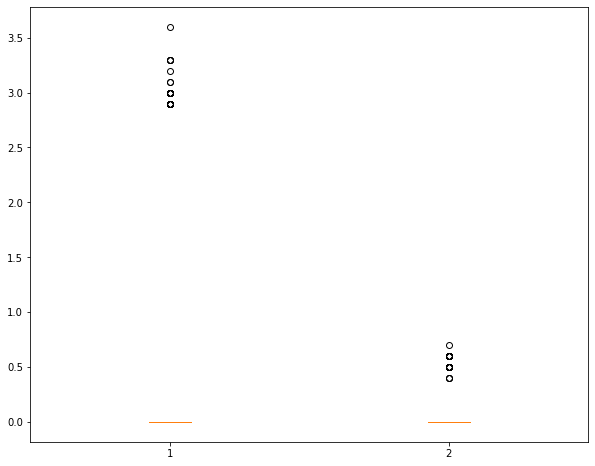

In [13]:
plt.figure(figsize=(10,8))
plt.boxplot([train_df2.X_10, train_df2.X_11])
plt.show()

In [37]:
train_df.X_10.value_counts()/len(train_df)

0.0    0.999192
2.9    0.000303
3.0    0.000303
3.3    0.000101
3.1    0.000050
3.6    0.000025
3.2    0.000025
Name: X_10, dtype: float64

In [26]:
train_df.X_11.value_counts()

0.0    39580
0.5       12
0.6       11
0.4        3
0.7        1
Name: X_11, dtype: int64

In [14]:
train_df2.drop(columns=['X_10', 'X_11'], inplace=True)

## 안테나 패드 위치  train_df = ['X_14', 'X_15','X_16','X_17,'X_18']

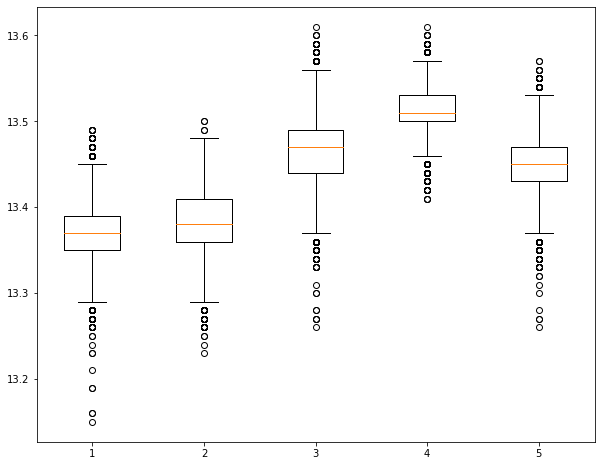

In [29]:
plt.figure(figsize=(10,8))
plt.boxplot([train_df.X_14, train_df.X_15, train_df.X_16, train_df.X_17, train_df.X_18])
plt.show()

In [32]:
antenna = train_df[['X_14', 'X_15', 'X_16', 'X_17', 'X_18']]
antenna.corr()

,X_14,X_15,X_16,X_17,X_18
X_14,1.000000,0.846266,0.615909,0.506614,0.860102
X_15,0.846266,1.000000,0.493607,0.602060,0.858704
X_16,0.615909,0.493607,1.000000,0.736319,0.744759
X_17,0.506614,0.602060,0.736319,1.000000,0.758397
X_18,0.860102,0.858704,0.744759,0.758397,1.000000


In [33]:
antenna.describe()

,X_14,X_15,X_16,X_17,X_18
count,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000
mean,13.372201,13.381914,13.463860,13.512589,13.449263
std,0.029865,0.029468,0.036741,0.023436,0.029093
min,13.150000,13.230000,13.260000,13.410000,13.260000
25%,13.350000,13.360000,13.440000,13.500000,13.430000
50%,13.370000,13.380000,13.470000,13.510000,13.450000
75%,13.390000,13.410000,13.490000,13.530000,13.470000
max,13.490000,13.500000,13.610000,13.610000,13.570000


In [107]:
antenna['mean'] = antenna.mean(axis = 1)
antenna

/var/folders/lm/z4n_2b8s6rj3_vv57sg789kc0000gn/T/ipykernel_94867/1090151052.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  antenna['mean'] = antenna.mean(axis = 1)


,X_14,X_15,X_16,X_17,X_18,mean
0,13.34,13.37,13.40,13.52,13.44,13.414
1,13.33,13.33,13.46,13.51,13.42,13.410
2,13.36,13.36,13.39,13.51,13.43,13.410
3,13.30,13.33,13.39,13.51,13.40,13.386
4,13.35,13.34,13.41,13.50,13.42,13.404
...,...,...,...,...,...,...
39602,13.37,13.38,13.51,13.52,13.46,13.448
39603,13.36,13.36,13.47,13.49,13.44,13.424
39604,13.38,13.39,13.47,13.52,13.46,13.444
39605,13.36,13.38,13.45,13.52,13.46,13.434


## 스크류 삽입 깊이 train_df['X_19', 'X_20', 'X_21', 'X_22']
drop!!

In [15]:
screw = train_df[['X_19', 'X_20', 'X_21', 'X_22']]
screw.describe()

,X_19,X_20,X_21,X_22
count,39607.000000,39607.000000,39607.000000,39607.000000
mean,3.240229,3.184493,3.174270,3.232673
std,0.110482,0.105266,0.106868,0.108981
min,2.860000,2.830000,2.830000,2.850000
25%,3.160000,3.100000,3.090000,3.140000
50%,3.220000,3.180000,3.160000,3.230000
75%,3.310000,3.270000,3.250000,3.320000
max,3.750000,3.670000,3.680000,3.790000


In [16]:
screw.corr()

,X_19,X_20,X_21,X_22
X_19,1.000000,0.636824,0.855176,0.660892
X_20,0.636824,1.000000,0.695565,0.831176
X_21,0.855176,0.695565,1.000000,0.668018
X_22,0.660892,0.831176,0.668018,1.000000


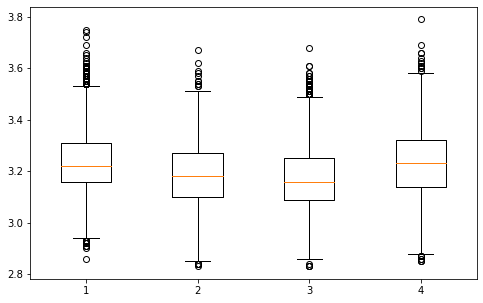

In [17]:
plt.figure(figsize=(8,5))
plt.boxplot(screw)
plt.show()

In [19]:
mean=screw.mean(axis = 1)

In [20]:
train_df2['screw'] = mean

In [21]:
screw['mean'] = screw.mean(axis = 1)
# screw.head(2)

/var/folders/lm/z4n_2b8s6rj3_vv57sg789kc0000gn/T/ipykernel_21265/3826151245.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  screw['mean'] = screw.mean(axis = 1)


In [22]:
train_df2.drop(columns=['X_19', 'X_20', 'X_21', 'X_22'], inplace=True)

## 	커넥터 1~6번 핀 치수 train_df['X_24','X_25',X_26',X_27','X_28','X_29']
drop!

In [23]:
connecter = train_df[['X_24','X_25','X_26','X_27','X_28','X_29']]
connecter.describe()

,X_24,X_25,X_26,X_27,X_28,X_29
count,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000
mean,2.115674,2.093895,2.090377,2.098249,2.118594,2.173727
std,0.032440,0.033148,0.038512,0.038056,0.042782,0.046689
min,1.830000,1.960000,1.980000,1.990000,1.930000,2.020000
25%,2.090000,2.070000,2.060000,2.070000,2.090000,2.140000
50%,2.120000,2.090000,2.090000,2.090000,2.120000,2.170000
75%,2.140000,2.120000,2.120000,2.120000,2.140000,2.200000
max,2.350000,2.350000,2.350000,2.350000,2.350000,2.360000


In [24]:
connecter.corr()

,X_24,X_25,X_26,X_27,X_28,X_29
X_24,1.000000,0.725475,0.816194,0.627911,0.700279,0.588131
X_25,0.725475,1.000000,0.672667,0.775328,0.590988,0.665554
X_26,0.816194,0.672667,1.000000,0.658264,0.750090,0.645966
X_27,0.627911,0.775328,0.658264,1.000000,0.648760,0.712328
X_28,0.700279,0.590988,0.750090,0.648760,1.000000,0.668306
X_29,0.588131,0.665554,0.645966,0.712328,0.668306,1.000000


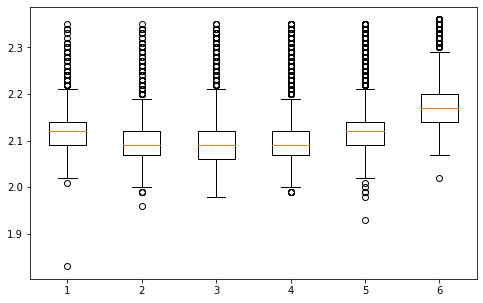

In [25]:
plt.figure(figsize=(8,5))
plt.boxplot(connecter)
plt.show()

In [124]:
connecter['connecter'] = connecter.mean(axis = 1)
connecter.head(2)

/var/folders/lm/z4n_2b8s6rj3_vv57sg789kc0000gn/T/ipykernel_94867/108759593.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  connecter['connecter'] = connecter.mean(axis = 1)


,X_24,X_25,X_26,X_27,X_28,X_29,connecter
0,2.05,2.07,2.05,2.06,2.06,2.35,2.106667
1,2.10,2.10,2.10,2.10,2.17,2.28,2.141667


In [26]:
train_df2['connecter'] = connecter.mean(axis = 1)
train_df2.head(2)

,ID,X_01,X_03,X_05,X_06,X_07,X_08,X_09,X_12,X_13,...,X_49,X_50,X_51,X_52,X_53,X_54,X_55,X_56,screw,connecter
0,TRAIN_00001,70.544,67.47,101.892,74.983,29.45,62.38,245.71,4.34,0.18,...,9706.03,137.043591,135.359219,147.837968,134.313475,125.605427,136.721425,125.028256,3.1175,2.106667
1,TRAIN_00002,69.524,65.17,101.944,72.943,28.73,61.23,233.61,4.38,0.18,...,10423.43,133.736691,135.979817,149.924692,123.630583,127.893337,143.322659,124.877308,3.0475,2.141667


In [27]:
train_df2.drop(columns=['X_24','X_25','X_26','X_27','X_28','X_29'],inplace=True)

In [28]:
train_df2.shape

(39607, 41)

## 하우징 PCB 안착부 치수 train_df['X_38','X_39','X_40']
drop!!

In [29]:
PCB = train_df2[['X_38','X_39','X_40']]

In [30]:
PCB.describe()

,X_38,X_39,X_40
count,39607.000000,39607.000000,39607.000000
mean,-15.903737,-15.889576,-16.572162
std,0.595420,0.746665,0.344486
min,-17.090000,-17.090000,-17.720000
25%,-16.160000,-16.160000,-16.810000
50%,-15.990000,-15.990000,-16.640000
75%,-15.750000,-15.750000,-16.400000
max,32.230000,-2.650000,-14.800000


In [212]:
PCB['mean'] = PCB.mean(axis = 1)

/var/folders/lm/z4n_2b8s6rj3_vv57sg789kc0000gn/T/ipykernel_94867/4151078004.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PCB['mean'] = PCB.mean(axis = 1)


In [31]:
train_df2['PCB'] = PCB.mean(axis = 1)
train_df2.head(2)

,ID,X_01,X_03,X_05,X_06,X_07,X_08,X_09,X_12,X_13,...,X_50,X_51,X_52,X_53,X_54,X_55,X_56,screw,connecter,PCB
0,TRAIN_00001,70.544,67.47,101.892,74.983,29.45,62.38,245.71,4.34,0.18,...,137.043591,135.359219,147.837968,134.313475,125.605427,136.721425,125.028256,3.1175,2.106667,-16.600000
1,TRAIN_00002,69.524,65.17,101.944,72.943,28.73,61.23,233.61,4.38,0.18,...,133.736691,135.979817,149.924692,123.630583,127.893337,143.322659,124.877308,3.0475,2.141667,-16.303333


In [32]:
train_df2.drop(columns=['X_38','X_39','X_40'], inplace=True)

## 레이돔 치수 (안테나 부위) train_df['X_41','X_42','X_43','X_44']
drop!

In [33]:
radome = train_df[['X_41','X_42','X_43','X_44']]
radome.describe()

,X_41,X_42,X_43,X_44
count,39607.000000,39607.000000,39607.000000,39607.000000
mean,21.186992,21.059334,21.203705,21.160107
std,0.031128,0.040288,0.047211,0.042176
min,20.730000,20.790000,20.800000,20.930000
25%,21.170000,21.030000,21.170000,21.130000
50%,21.190000,21.060000,21.200000,21.160000
75%,21.210000,21.090000,21.240000,21.190000
max,21.620000,21.440000,21.410000,21.320000


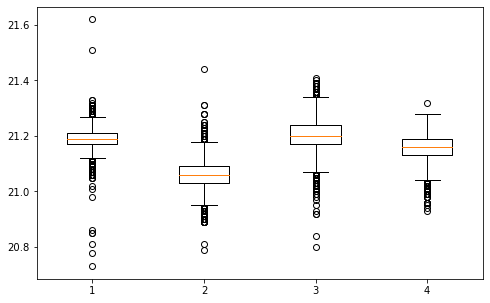

In [34]:
plt.figure(figsize=(8,5))
plt.boxplot(radome)
plt.show()

In [37]:
radome['mean'] = radome.mean(axis = 1)
# radome

/var/folders/lm/z4n_2b8s6rj3_vv57sg789kc0000gn/T/ipykernel_21265/3751970350.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  radome['mean'] = radome.mean(axis = 1)


In [39]:
train_df2['radome'] = radome.mean(axis=1)

In [41]:
train_df2.drop(columns=['X_41','X_42','X_43','X_44'], inplace=True)

##  RF 1 ~ 7 부분 SMT 납 량 : train_df['X_50~56']
drop!

In [100]:
SMT = train_df.iloc[:,50:]
SMT.head(2)

,X_50,X_51,X_52,X_53,X_54,X_55,X_56
0,138.130429,129.460682,141.506570,133.427229,129.711498,133.138096,121.859684
1,136.148839,128.266277,145.911745,131.196417,132.411480,133.629025,124.178623


In [101]:
SMT.describe()

,X_50,X_51,X_52,X_53,X_54,X_55,X_56
count,39608.000000,39608.000000,39608.000000,39608.000000,39608.000000,39608.000000,39608.000000
mean,130.792771,131.506077,138.619585,128.012468,128.024288,137.897399,128.479544
std,6.283461,6.248113,6.711747,6.022616,5.783733,6.825189,5.766703
min,21.800000,21.910000,23.100000,21.330000,21.340000,22.980000,21.410000
25%,127.007745,127.715514,134.507082,124.397173,124.726521,133.703757,125.172442
50%,130.748868,131.460499,138.622976,128.048022,128.136952,137.892594,128.468109
75%,134.562718,135.301195,142.792608,131.706046,131.502206,142.087140,131.889357
max,162.657956,161.207806,177.616739,169.774016,169.065281,169.452855,159.642590


In [102]:
SMT.corr()

,X_50,X_51,X_52,X_53,X_54,X_55,X_56
X_50,1.000000,0.466591,0.472083,0.553410,0.525219,0.500562,0.493637
X_51,0.466591,1.000000,0.481071,0.547477,0.503469,0.462100,0.451028
X_52,0.472083,0.481071,1.000000,0.537821,0.469835,0.623511,0.481948
X_53,0.553410,0.547477,0.537821,1.000000,0.570951,0.490595,0.479412
X_54,0.525219,0.503469,0.469835,0.570951,1.000000,0.475308,0.453502
X_55,0.500562,0.462100,0.623511,0.490595,0.475308,1.000000,0.509252
X_56,0.493637,0.451028,0.481948,0.479412,0.453502,0.509252,1.000000


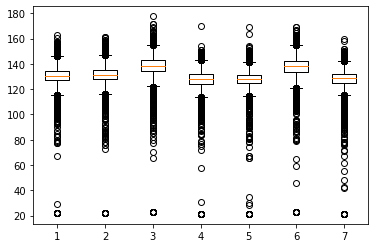

In [103]:
# plt.figure(figsize=(15,10))
plt.boxplot(SMT)
plt.show()

In [104]:
SMT['mean'] = SMT.mean(axis = 1)
SMT.head(2)

,X_50,X_51,X_52,X_53,X_54,X_55,X_56,mean
0,138.130429,129.460682,141.506570,133.427229,129.711498,133.138096,121.859684,132.462027
1,136.148839,128.266277,145.911745,131.196417,132.411480,133.629025,124.178623,133.106058


In [105]:
train_df2['SMT'] = SMT.mean(axis = 1)
train_df2.head(2)

,ID,X_01,X_03,X_05,X_06,X_07,X_08,X_09,X_12,X_13,...,X_36,X_37,X_45,X_49,X_screw,X_connecter,X_PCB,X_radome,X_SMT,SMT
0,TRAIN_00001,70.544,67.47,101.892,74.983,29.45,62.38,245.71,4.34,0.18,...,12.89,12.99,0.29,9706.03,3.1175,2.106667,-16.600000,21.14,5.505714,132.462027
1,TRAIN_00002,69.524,65.17,101.944,72.943,28.73,61.23,233.61,4.38,0.18,...,12.89,12.93,0.13,10423.43,3.0475,2.141667,-16.303333,21.12,5.522857,133.106058


In [45]:
train_df2.drop(columns=['X_50', 'X_51', 'X_52', 'X_53', 'X_54', 'X_55', 'X_56'], inplace=True)

In [107]:
train_df2.head(2)

,ID,X_01,X_03,X_05,X_06,X_07,X_08,X_09,X_12,X_13,...,X_35,X_36,X_37,X_45,X_49,X_screw,X_connecter,X_PCB,X_radome,SMT
0,TRAIN_00001,70.544,67.47,101.892,74.983,29.45,62.38,245.71,4.34,0.18,...,12.88,12.89,12.99,0.29,9706.03,3.1175,2.106667,-16.600000,21.14,132.462027
1,TRAIN_00002,69.524,65.17,101.944,72.943,28.73,61.23,233.61,4.38,0.18,...,12.87,12.89,12.93,0.13,10423.43,3.0475,2.141667,-16.303333,21.12,133.106058


In [108]:
train_df2.rename(columns ={'screw': 'X_screw','connecter': 'X_connecter', 'PCB':'X_PCB','radome':'X_radome','SMT':'X_SMT'}, inplace=True)

In [109]:
train_df2.shape

(39607, 30)

## 시간 -> 분 (3600 나눔)

In [126]:
train_df2.drop(columns=['X_49'],inplace=True)

In [127]:
train_df2['X_49'] = train_df['X_49']/3600

In [110]:
train_df = pd.concat([train_df2, train_y], ignore_index=False, axis = 1, join='outer' )

In [111]:
train_df.shape

(39607, 44)

In [122]:
train_df.to_csv(base_path+'FeatureEngineering_train.csv', index=False)

In [139]:
train_df.columns

Index(['ID', 'X_01', 'X_03', 'X_05', 'X_06', 'X_07', 'X_08', 'X_09', 'X_12',
       'X_13', 'X_14', 'X_15', 'X_16', 'X_17', 'X_18', 'X_30', 'X_31', 'X_32',
       'X_33', 'X_34', 'X_35', 'X_36', 'X_37', 'X_45', 'X_screw',
       'X_connecter', 'X_PCB', 'X_radome', 'X_SMT', 'Y_01', 'Y_02', 'Y_03',
       'Y_04', 'Y_05', 'Y_06', 'Y_07', 'Y_08', 'Y_09', 'Y_10', 'Y_11', 'Y_12',
       'Y_13', 'Y_14', 'X_49'],
      dtype='object')